In [1]:
import pandas as pd

In [6]:
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'

df = pd.read_csv(path, header=0)

In [7]:
df.head()

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


In [9]:
df.shape

(108, 2)

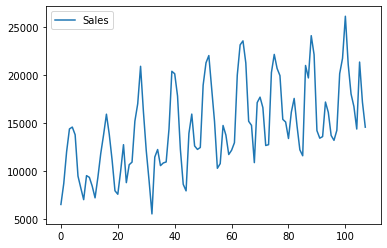

In [10]:
#visualize data

from matplotlib import pyplot

df.plot()
pyplot.show()

In [11]:
df.dtypes
#prophet-> ds and y

Month    object
Sales     int64
dtype: object

In [15]:
df.columns = ['ds', 'y']

df['ds'] = pd.to_datetime(df['ds'])

In [16]:
df.dtypes

ds    datetime64[ns]
y              int64
dtype: object

In [21]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 80 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6638875 sha256=ee37e10d746a6ee92658f181fe39ff822b9b80a781085b5ff69b23194ca7524a
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet


In [22]:
#create the model

from fbprophet import Prophet

model = Prophet()

model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [33]:
past = list()

for i in range(1, 13):
  date = '1968-%02d' % i 
  past.append([date])


past = pd.DataFrame(past)
past.columns = ['ds']
past['ds'] = pd.to_datetime(past['ds'])
forecast = model.predict(past)


In [34]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1968-01-01,17795.101137,12722.316435,15778.286368,17795.101137,17795.101137,-3460.363368,-3460.363368,-3460.363368,-3460.363368,-3460.363368,-3460.363368,0.0,0.0,0.0,14334.737769
1,1968-02-01,17850.076787,13393.352625,16562.472655,17850.076787,17850.076787,-2944.120823,-2944.120823,-2944.120823,-2944.120823,-2944.120823,-2944.120823,0.0,0.0,0.0,14905.955964
2,1968-03-01,17901.505622,19261.479062,22431.836709,17901.505622,17901.505622,2940.644880,2940.644880,2940.644880,2940.644880,2940.644880,2940.644880,0.0,0.0,0.0,20842.150502
3,1968-04-01,17956.481273,21236.591654,24436.621655,17956.481273,17956.481273,4913.613942,4913.613942,4913.613942,4913.613942,4913.613942,4913.613942,0.0,0.0,0.0,22870.095215
4,1968-05-01,18009.683516,22608.878067,25656.977992,18009.683516,18009.683516,6166.527646,6166.527646,6166.527646,6166.527646,6166.527646,6166.527646,0.0,0.0,0.0,24176.211162
5,1968-06-01,18064.659167,19544.351309,22673.186803,18064.659167,18064.659167,2993.020023,2993.020023,2993.020023,2993.020023,2993.020023,2993.020023,0.0,0.0,0.0,21057.679190
6,1968-07-01,18117.861409,16047.000752,19141.859427,18117.861409,18117.861409,-532.371981,-532.371981,-532.371981,-532.371981,-532.371981,-532.371981,0.0,0.0,0.0,17585.489428
7,1968-08-01,18172.837060,13829.376759,16815.172935,18172.837060,18172.837060,-2883.575173,-2883.575173,-2883.575173,-2883.575173,-2883.575173,-2883.575173,0.0,0.0,0.0,15289.261887
8,1968-09-01,18227.812711,12071.908235,15407.869417,18227.812711,18227.812711,-4506.374429,-4506.374429,-4506.374429,-4506.374429,-4506.374429,-4506.374429,0.0,0.0,0.0,13721.438281
9,1968-10-01,18281.014954,16560.545078,19671.225934,18281.014954,18281.014954,-147.104077,-147.104077,-147.104077,-147.104077,-147.104077,-147.104077,0.0,0.0,0.0,18133.910877


In [35]:
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,1968-01-01,14334.737769,12722.316435,15778.286368
1,1968-02-01,14905.955964,13393.352625,16562.472655
2,1968-03-01,20842.150502,19261.479062,22431.836709
3,1968-04-01,22870.095215,21236.591654,24436.621655
4,1968-05-01,24176.211162,22608.878067,25656.977992
5,1968-06-01,21057.679190,19544.351309,22673.186803
6,1968-07-01,17585.489428,16047.000752,19141.859427
7,1968-08-01,15289.261887,13829.376759,16815.172935
8,1968-09-01,13721.438281,12071.908235,15407.869417
9,1968-10-01,18133.910877,16560.545078,19671.225934


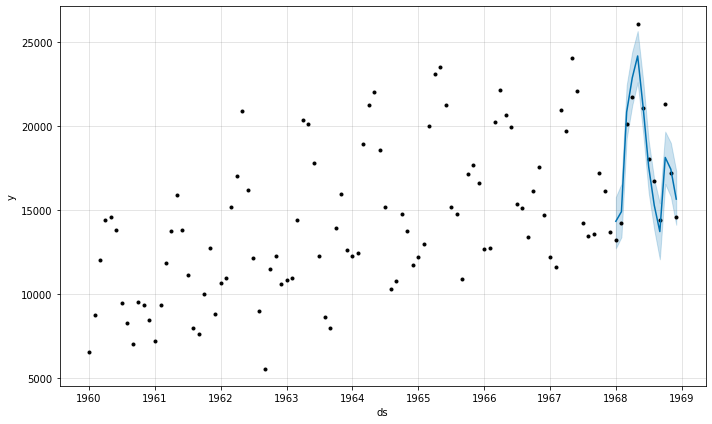

In [36]:
model.plot(forecast)
pyplot.show()

           ds          yhat    yhat_lower    yhat_upper
0  1969-01-01  15375.960093  13667.960300  16946.789929
1  1969-02-01  16142.271673  14503.233936  17708.219244
2  1969-03-01  21351.832640  19770.330007  22870.175865
3  1969-04-01  23477.889811  21849.511664  25009.207089
4  1969-05-01  24988.440907  23440.566676  26564.860861
5  1969-06-01  22249.041153  20658.151399  23906.629737
6  1969-07-01  17902.329924  16304.063849  19456.471359
7  1969-08-01  15730.201800  14062.720242  17284.397541
8  1969-09-01  14235.957070  12585.561826  15831.852485
9  1969-10-01  18671.780127  17064.587907  20198.909876
10 1969-11-01  18573.505386  16822.991880  20163.001835
11 1969-12-01  16386.033106  14824.546155  18021.709159


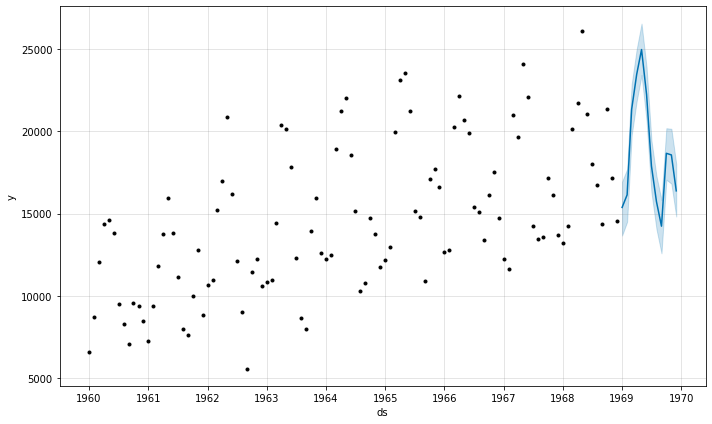

In [39]:
#'69 doesnt exist in dataset
future = list()

for i in range(1, 13):
  date = '1969-%02d' % i 
  future.append([date])


future = pd.DataFrame(future)
future.columns = ['ds']
future['ds'] = pd.to_datetime(future['ds'])
forecast = model.predict(future)

print(forecast[['ds','yhat','yhat_lower','yhat_upper']])

model.plot(forecast)
pyplot.show()


In [ ]:
# extract the last 12 months from dataset
# train model
# compare predictions and actual values

In [41]:
import pandas as pd
from fbprophet import Prophet
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot

path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = pd.read_csv(path, header=0)

df.columns = ['ds', 'y']
df['ds']= pd.to_datetime(df['ds'])

In [42]:
train = df.drop(df.index[-12:])
print(train.tail())

           ds      y
91 1967-08-01  13434
92 1967-09-01  13598
93 1967-10-01  17187
94 1967-11-01  16119
95 1967-12-01  13713


In [43]:
model = Prophet()
model.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [44]:
future = list()
for i in range(1, 13):
    date = '1968-%02d' % i
    future.append([date])
    
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds'] = pd.to_datetime(future['ds'])

forecast = model.predict(future)

In [45]:
y_true = df['y'][-12:].values
y_pred = forecast['yhat'].values

In [48]:
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

MAE: 1336.814


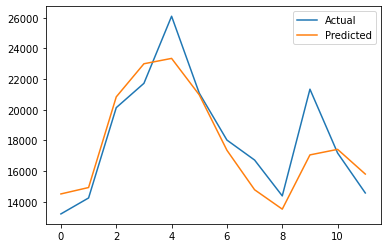

In [49]:
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()